ModuleNotFoundError: No module named 'seaborn'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Configurações de exibição e visualização
sns.set_style("whitegrid")
# Formata números grandes em notação de milhar/milhão (R$ X.XXX,XX)
pd.set_option('display.float_format', '{:,.2f}'.format) 

# --- 1. CARREGAR DADOS ---
# Caminho para o arquivo processado (o .ipynb está em scripts/, então subimos um nível e descemos para dados_processados/)
output_file = os.path.join('..', 'dados_processados', 'dataset_final.csv')

# Obter o caminho absoluto para depuração, se necessário
script_dir = os.path.dirname(os.path.abspath('__file__'))
data_path = os.path.join(script_dir, output_file)

print(f"Tentando carregar dados de: {data_path}")

# Carregar o dataset processado
try:
    df = pd.read_csv(output_file)
    # Converter colunas de data (o ETL já limpou e criou ano_mes)
    df['data_venda'] = pd.to_datetime(df['data_venda'])
    df['ano_mes'] = pd.to_datetime(df['ano_mes']) 
except FileNotFoundError:
    print("ERRO CRÍTICO: O arquivo dataset_final.csv não foi encontrado! Execute o etl_dados.py novamente.")
    sys.exit() # Interrompe a execução se o dado não estiver pronto

print("\n--- KPI's GERAIS: Vendas 2024 ---")

# 1. Receita Total
receita_total = df['receita_liquida'].sum()
print(f"1. Receita Total (Jan-Dez 2024): R$ {receita_total:,.2f}")

# 2. Margem Bruta Total e Percentual
margem_bruta_total = df['margem_bruta_total'].sum()
margem_percentual = (margem_bruta_total / receita_total) * 100 if receita_total > 0 else 0
print(f"2. Margem Bruta Total: R$ {margem_bruta_total:,.2f}")
print(f"3. Margem Percentual: {margem_percentual:.2f}%")

# 4. Ticket Médio (Receita / Número de Vendas Únicas)
ticket_medio = df['receita_liquida'].sum() / df['id_venda'].nunique()
print(f"4. Ticket Médio (por transação): R$ {ticket_medio:,.2f}")

# 5. Total de Itens Vendidos
itens_vendidos = df['quantidade'].sum()
print(f"5. Total de Itens Vendidos: {itens_vendidos:,.0f} unidades.")

Tentando carregar dados de: c:\Users\jadie\ComercioTech_Analise_Vendas\scripts\..\dados_processados\dataset_final.csv

--- KPI's GERAIS: Vendas 2024 ---
1. Receita Total (Jan-Dez 2024): R$ 12,112,840.59
2. Margem Bruta Total: R$ 2,981,805.04
3. Margem Percentual: 24.62%
4. Ticket Médio (por transação): R$ 12,112.84
5. Total de Itens Vendidos: 3,066 unidades.



--- TOP 10 PRODUTOS MAIS VENDIDOS (Por Receita) ---
  nome_produto  receita_total  margem_total  quantidade_total  \
0   Produto_11     745,700.21    246,009.79               173   
1   Produto_12     733,193.08    299,606.18               179   
2    Produto_5     687,689.10    208,472.18               158   
3   Produto_13     684,096.31    288,640.42               169   
4   Produto_15     656,381.40    136,471.25               171   
5    Produto_9     655,643.30    218,903.60               146   
6   Produto_17     641,726.65     98,308.74               169   
7   Produto_18     640,703.55    158,518.03               157   
8   Produto_14     627,721.32    172,232.27               160   
9    Produto_3     620,032.56    123,135.20               164   

   margem_percentual  
0              32.99  
1              40.86  
2              30.31  
3              42.19  
4              20.79  
5              33.39  
6              15.32  
7              24.74  
8              27.44  
9

C:\Users\jadie\AppData\Local\Temp\ipykernel_5744\4004993882.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='receita_total', y='nome_produto', data=top_produtos_receita, palette="viridis")


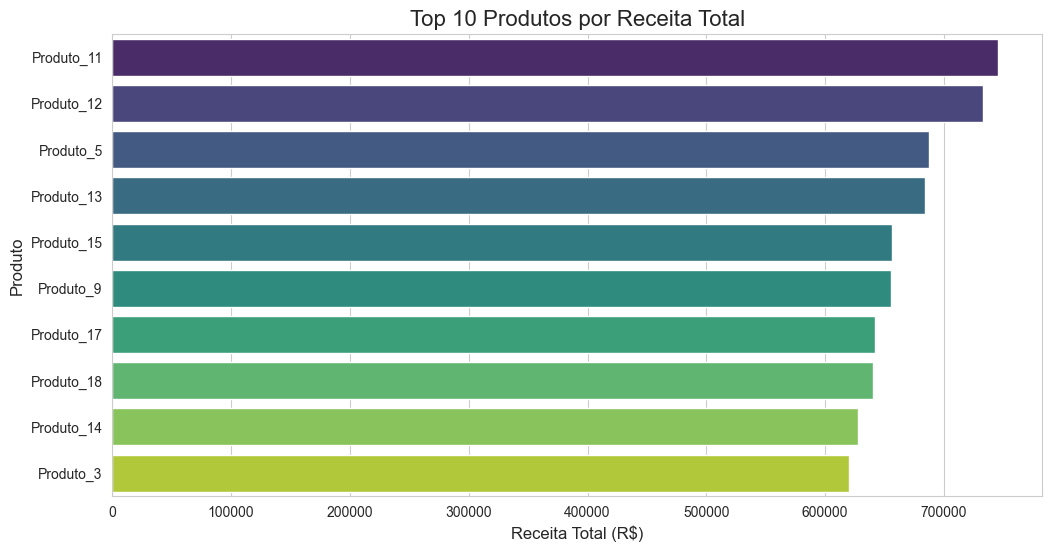


--- 7. DESEMPENHO CONSOLIDADO POR CATEGORIA ---
  categoria_produto  receita_total  margem_bruta_total  qtd_total  \
0         Acessório   5,608,761.91        1,568,476.41       1405   
1          Notebook   3,576,284.41          662,702.12        930   
2        Smartphone   2,927,794.27          750,626.51        731   

   margem_percentual  ticket_medio_categoria  
0              27.96                3,992.00  
1              18.53                3,845.47  
2              25.64                4,005.19  


C:\Users\jadie\AppData\Local\Temp\ipykernel_5744\4004993882.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='margem_percentual', y='categoria_produto',


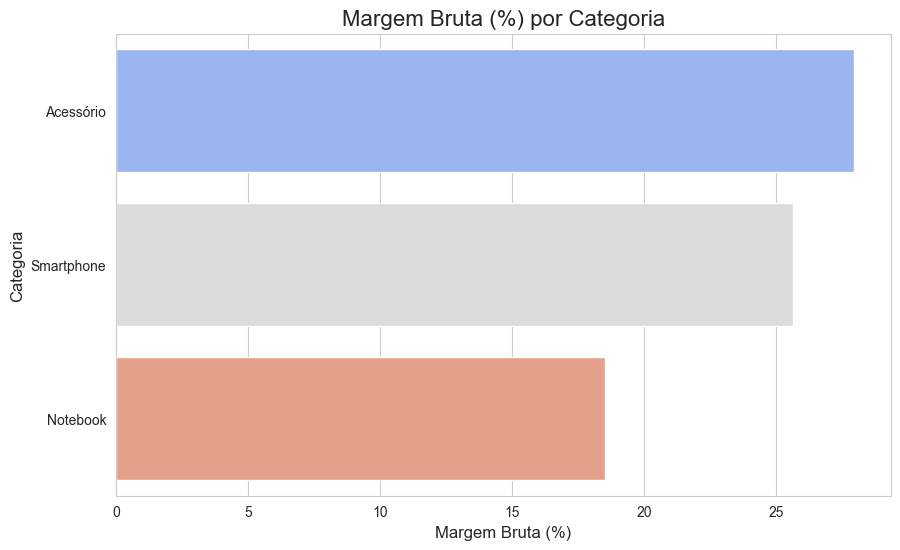

In [3]:
# --- 6. TOP 10 PRODUTOS E MARGEM POR CATEGORIA ---

print("\n--- TOP 10 PRODUTOS MAIS VENDIDOS (Por Receita) ---")

# 6.1. Top 10 por Receita: Agrega vendas por produto
top_produtos_receita = df.groupby('nome_produto').agg(
    receita_total=('receita_liquida', 'sum'),
    margem_total=('margem_bruta_total', 'sum'),
    quantidade_total=('quantidade', 'sum')
).sort_values(by='receita_total', ascending=False).head(10).reset_index()

top_produtos_receita['margem_percentual'] = (top_produtos_receita['margem_total'] / top_produtos_receita['receita_total']) * 100

print(top_produtos_receita)

# 6.2. Visualização Top 10 (Receita)
plt.figure(figsize=(12, 6))
sns.barplot(x='receita_total', y='nome_produto', data=top_produtos_receita, palette="viridis")
plt.title('Top 10 Produtos por Receita Total', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()


print("\n--- 7. DESEMPENHO CONSOLIDADO POR CATEGORIA ---")

# 7.1. Agregação por Categoria
df_categoria = df.groupby('categoria_produto').agg(
    receita_total=('receita_liquida', 'sum'),
    margem_bruta_total=('margem_bruta_total', 'sum'),
    qtd_total=('quantidade', 'sum')
).reset_index()

df_categoria['margem_percentual'] = (df_categoria['margem_bruta_total'] / df_categoria['receita_total']) * 100
df_categoria['ticket_medio_categoria'] = df_categoria['receita_total'] / df_categoria['qtd_total']

df_categoria_sorted = df_categoria.sort_values(by='receita_total', ascending=False)
print(df_categoria_sorted)

# 7.2. Visualização Margem por Categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='margem_percentual', y='categoria_produto', 
            data=df_categoria_sorted.sort_values(by='margem_percentual', ascending=False), 
            palette="coolwarm")
plt.title('Margem Bruta (%) por Categoria', fontsize=16)
plt.xlabel('Margem Bruta (%)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()



--- RECEITA POR FAIXA ETÁRIA ---
  faixa_etaria  receita_liquida
0        18-25     2,407,039.65
1        26-35     3,677,410.74
2        36-45     2,453,855.44
3        46-60     3,574,534.76


C:\Users\jadie\AppData\Local\Temp\ipykernel_5744\482995161.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='faixa_etaria', y='receita_liquida', data=df_idade, palette="mako")


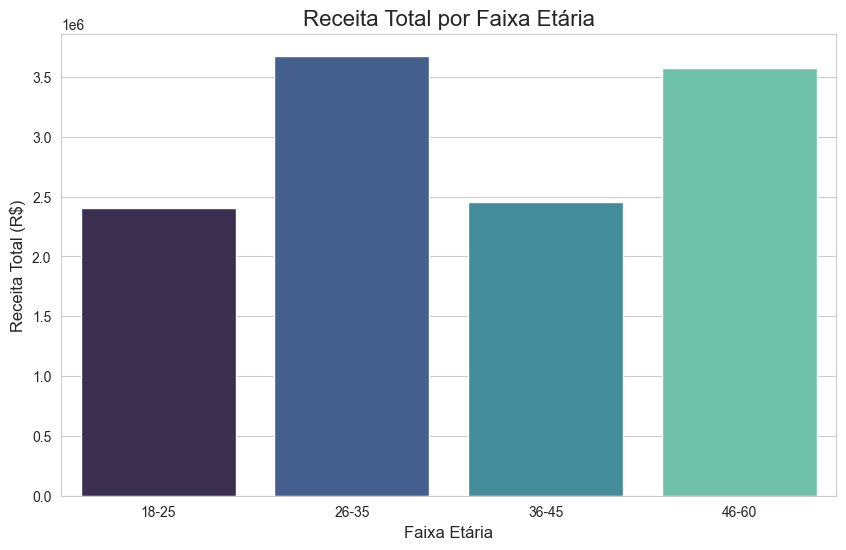


--- RECEITA POR GÊNERO ---
  genero_cliente  receita_liquida
0              F     6,335,358.28
1              M     5,777,482.31


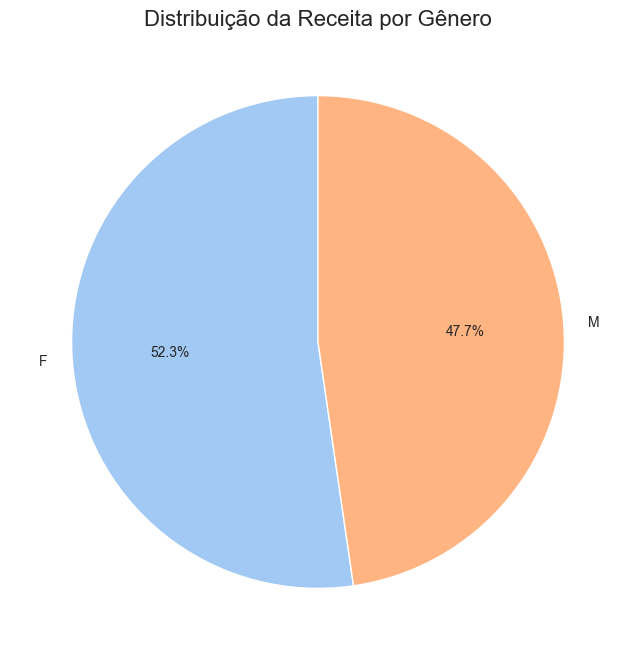


--- EVOLUÇÃO MENSAL DA RECEITA (Sazonalidade) ---
      ano_mes  receita_realizada  margem_realizada mes_label
0  2024-01-01         909,918.81         70,369.57   2024-01
1  2024-02-01         998,988.22        242,361.24   2024-02
2  2024-03-01         817,400.21        184,436.08   2024-03
3  2024-04-01       1,147,244.38        310,529.97   2024-04
4  2024-05-01       1,259,355.79        251,180.24   2024-05
5  2024-06-01       1,115,286.69        269,327.08   2024-06
6  2024-07-01         852,210.59        294,342.37   2024-07
7  2024-08-01       1,191,457.49        379,752.62   2024-08
8  2024-09-01         965,094.67        275,956.84   2024-09
9  2024-10-01       1,136,323.71        270,201.29   2024-10
10 2024-11-01         919,570.55        284,344.02   2024-11
11 2024-12-01         799,989.48        149,003.72   2024-12


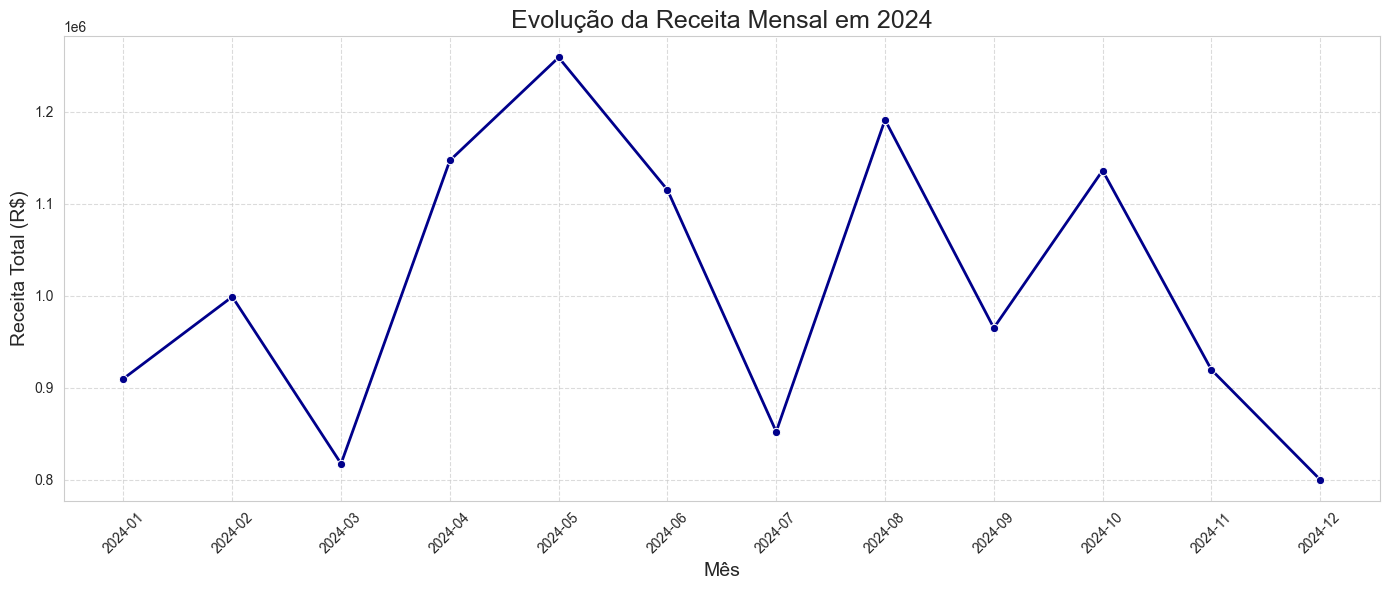

In [4]:
# --- 8. ANÁLISE DO PERFIL DO CLIENTE (DEMOGRAFIA) ---

print("\n--- RECEITA POR FAIXA ETÁRIA ---")

# 8.1. Agregação por Faixa Etária
df_idade = df.groupby('faixa_etaria')['receita_liquida'].sum().reset_index()
# Ordena as faixas etárias para melhor visualização (se o formato permitir)
idade_ordem = ['18-25', '26-35', '36-45', '46-60'] 
df_idade['faixa_etaria'] = pd.Categorical(df_idade['faixa_etaria'], categories=idade_ordem, ordered=True)
df_idade = df_idade.sort_values('faixa_etaria').dropna()

print(df_idade)

# 8.2. Visualização Receita por Faixa Etária
plt.figure(figsize=(10, 6))
sns.barplot(x='faixa_etaria', y='receita_liquida', data=df_idade, palette="mako")
plt.title('Receita Total por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Receita Total (R$)', fontsize=12)
plt.show()


print("\n--- RECEITA POR GÊNERO ---")

# 8.3. Agregação por Gênero
df_genero = df.groupby('genero_cliente')['receita_liquida'].sum().reset_index()
df_genero_sorted = df_genero.sort_values(by='receita_liquida', ascending=False)
print(df_genero_sorted)

# 8.4. Visualização Receita por Gênero
plt.figure(figsize=(8, 8))
plt.pie(df_genero_sorted['receita_liquida'], 
        labels=df_genero_sorted['genero_cliente'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'))
plt.title('Distribuição da Receita por Gênero', fontsize=16)
plt.show()


# --- 9. SAZONALIDADE: VENDAS POR MÊS ---

print("\n--- EVOLUÇÃO MENSAL DA RECEITA (Sazonalidade) ---")

# Agregação por Mês/Ano (usando 'ano_mes' que é o 1º dia de cada mês)
df_sazonalidade = df.groupby('ano_mes').agg(
    receita_realizada=('receita_liquida', 'sum'),
    margem_realizada=('margem_bruta_total', 'sum')
).reset_index()

df_sazonalidade['mes_label'] = df_sazonalidade['ano_mes'].dt.strftime('%Y-%m')

print(df_sazonalidade)

# Visualização da Sazonalidade
plt.figure(figsize=(14, 6))
sns.lineplot(x='mes_label', y='receita_realizada', data=df_sazonalidade, marker='o', color='darkblue', linewidth=2)
plt.title('Evolução da Receita Mensal em 2024', fontsize=18)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Receita Total (R$)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- 10.1 CÁLCULO DE ATINGIMENTO DE METAS POR MÊS E REGIÃO ---

 Comparativo Mês-a-Mês e Região (Atingimento de Receita):
   mes_nome        regiao  receita_realizada  meta_receita  \
15      Apr  Centro-Oeste         144,502.49           NaN   
16      Apr      Nordeste         191,907.57           NaN   
17      Apr         Norte         237,989.89           NaN   
18      Apr       Sudeste         291,780.51           NaN   
19      Apr           Sul         281,063.92           NaN   
35      Aug  Centro-Oeste         269,737.41           NaN   
36      Aug      Nordeste         165,907.26           NaN   
37      Aug         Norte         253,491.07           NaN   
38      Aug       Sudeste         218,586.10           NaN   
39      Aug           Sul         283,735.65           NaN   
55      Dec  Centro-Oeste         114,016.06           NaN   
56      Dec      Nordeste         154,057.69           NaN   
57      Dec         Norte         166,081.95           NaN   
58      De

C:\Users\jadie\AppData\Local\Temp\ipykernel_5744\2468860387.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='atingimento_total_%', y='regiao', data=df_ranking_sorted, palette="magma")


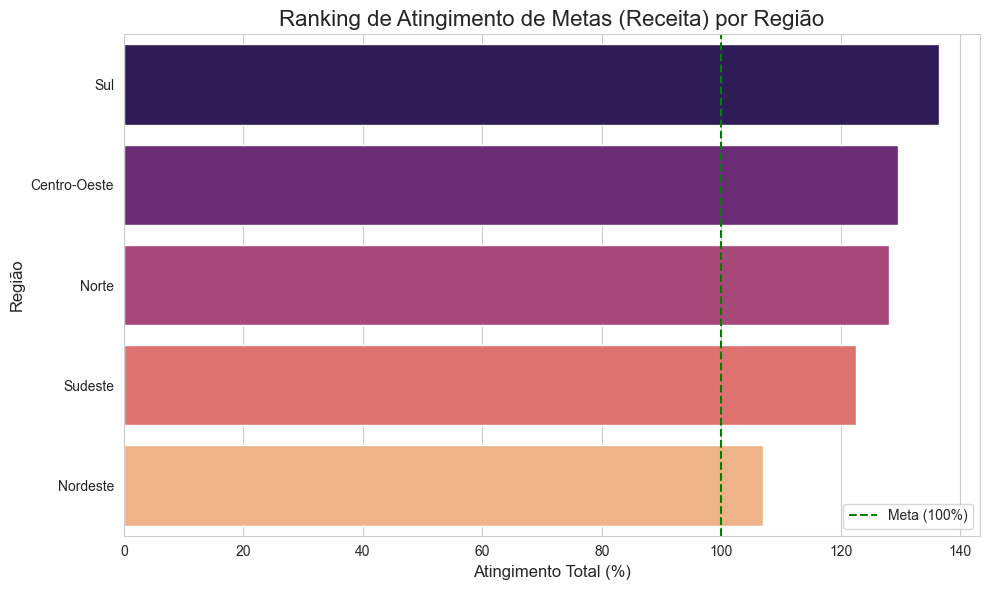

In [5]:
# --- 10. COMPARATIVO COM METAS E RANKING REGIONAL ---

print("\n--- 10.1 CÁLCULO DE ATINGIMENTO DE METAS POR MÊS E REGIÃO ---")

# 1. Agregação do Realizado (Receita e Margem) por Mês e Região
df_realizado_regional = df.groupby(['ano_mes', 'mes_nome', 'regiao']).agg(
    receita_realizada=('receita_liquida', 'sum'),
    margem_realizada=('margem_bruta_total', 'sum')
).reset_index()

# 2. Merge com as Metas (usando df_meta que foi integrada no ETL)
# Como a meta é a mesma para todas as regiões (limitação da base), faremos um merge simples por mes_nome
df_comparativo = pd.merge(
    df_realizado_regional,
    df[['mes_nome', 'meta_receita', 'meta_margem']].drop_duplicates(), # Pega a meta por mês
    on='mes_nome',
    how='left'
)

# 3. Cálculo do Atingimento
df_comparativo['atingimento_receita_%'] = (df_comparativo['receita_realizada'] / df_comparativo['meta_receita']) * 100
df_comparativo['atingimento_margem_%'] = (df_comparativo['margem_realizada'] / (df_comparativo['meta_receita'] * df_comparativo['meta_margem'] / 100)) * 100

print("\n Comparativo Mês-a-Mês e Região (Atingimento de Receita):")
print(df_comparativo[['mes_nome', 'regiao', 'receita_realizada', 'meta_receita', 'atingimento_receita_%']].sort_values(by=['mes_nome', 'atingimento_receita_%'], ascending=[True, False]))


# --- 10.2 RANKING CONSOLIDADO POR REGIÃO ---

print("\n--- 10.2 RANKING DE DESEMPENHO REGIONAL (CONSOLIDADO) ---")

# 1. Agregação do Realizado e Meta por Região
df_ranking = df_comparativo.groupby('regiao').agg(
    receita_total=('receita_realizada', 'sum'),
    meta_total=('meta_receita', 'sum')
).reset_index()

# 2. Cálculo do Atingimento Total
df_ranking['atingimento_total_%'] = (df_ranking['receita_total'] / df_ranking['meta_total']) * 100
df_ranking['ranking'] = df_ranking['atingimento_total_%'].rank(ascending=False).astype(int)

# 3. Visualização Ranking
df_ranking_sorted = df_ranking.sort_values(by='ranking')
print(df_ranking_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x='atingimento_total_%', y='regiao', data=df_ranking_sorted, palette="magma")
plt.title('Ranking de Atingimento de Metas (Receita) por Região', fontsize=16)
plt.xlabel('Atingimento Total (%)', fontsize=12)
plt.ylabel('Região', fontsize=12)

# Adiciona linha de 100% de meta
plt.axvline(100, color='green', linestyle='--', linewidth=1.5, label='Meta (100%)')
plt.legend()
plt.tight_layout()
plt.show()